In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [45]:
# df has the closing prices of the stocks, df2 has all of df and nifty 500 closing prices
df = pd.read_csv('closing_price.csv')
df2 = pd.read_csv('closing_price_nifty500.csv')

In [46]:
daily_return = df.pct_change()
annual_return = daily_return.mean()*250
daily_cov = daily_return.cov()
annual_cov = daily_cov*250

daily_return2 = df2.pct_change()
annual_return2 = daily_return2.mean()*250
daily_cov2 = daily_return2.cov()
annual_cov2 = daily_cov2*250

portfolio_reutrn = []
portfolio_risk = []
stock_weights = []
n = 1000000
tickers = ['adani', 'gail' , 'hdfc' , 'infy' , 'kotak', 'reliance' , 'tatasteel']

In [47]:
annual_return_np = np.array(annual_return2)

In [48]:
#calculating beta by taking the covariance matrix of df2 and 
#dividing the last column(the covariances wrt nifty 500) by the variance of Nifty 500
annual_cov2_np = np.array(annual_cov2['nifty 500'])
beta = annual_cov2_np/annual_cov2_np[7]
print(beta)

[1.25921643 1.07375378 1.30263188 0.68172799 1.20365312 0.89188319
 1.34948012 1.        ]


In [49]:
# within loop generating random portfolio weights(optionally by tewaking the uniform distribution)
# calculating returns and risks and putting everything into the dataframe called portfolio which has 9 columns,
# risk , return and corresponding stock weights
for portf in range(n):
    weights = np.random.random(7)
    #weights = weights**(3)
    weights /= np.sum(weights)
    returns = np.dot(weights,annual_return)
    risk = np.sqrt(np.dot(weights.T,np.dot(annual_cov,weights)))
    
    portfolio_reutrn.append(returns)
    portfolio_risk.append(risk)
    stock_weights.append(weights)
    
portfolio = {'Returns': portfolio_reutrn, 'Risk': portfolio_risk}
for idx,tic in enumerate(tickers):
    portfolio[tic + '_weight'] = [weight[idx] for weight in stock_weights]

# df has been reused, sorry for that
df = pd.DataFrame(portfolio)
#print(df)
#data has just the risks and returns, data_np is numpy version of data
data=pd.concat([df['Returns'],df['Risk']],axis=1)
data_np = np.array(data)
#print(data)
# dividing the total risk spectrum into increasingly bigger intervals
beg=data_np[:,1].min() 
end=data_np[:,1].max()
r = (end/beg) ** (1/300)
step = np.zeros(300)
step[0] = beg
for i in range(1, 300):
  step[i] = beg * (r **i) 
  #print(beg * (r **i)) 
#step = data['Risk'].min()*(1/500)



In [50]:
X,Y=[],[],
# for each of the intervals in the risk spectrum, 
# from all the points that fall into it,
# taking the points which has the highest return
for i in range(0,299):
    try:
        y=data['Returns'][data['Risk']>=step[i]][data['Risk']<=step[i+1]].max()
        #print(data['Returns'][data['Risk']>=step[i]][data['Risk']<=step[i+1]].idxmax())
        #print(np.where(data_np[:,0]==y)[0][0])
        x=(step[i]+step[i+1])/2
        X.append(x) 
        Y.append(y)
    except:
        pass


In [51]:
#all_data is the numpy version of df (please note that df has been reused)
all_data = np.array(df)

In [52]:
#the index at which the portfolio with minimum variance lies
MVP_index = np.argmin(all_data[:,1])

In [53]:
# the return, risk and the weightage of the stocks (alphabetically) of MVP
print(all_data[MVP_index,:]*100)


[53.51991053 20.10505961  3.9265568  12.4063557   9.4581379  34.04741628
 16.30117921 22.03456026  1.82579384]


In [54]:
# beta of the MVP
print(np.dot(all_data[MVP_index,2:],beta[0:7]))

0.9553439652108459


In [56]:
#calculating the point with max sharpe ratio. the variable data had risks and returns of all the portfolios
Z= np.argmax((data['Returns']-0.05)/data['Risk'])
print(Z)
Z1 = np.max((data['Returns']-0.05)/data['Risk'])
print(Z1)

104019
3.671510432156978


In [57]:
# risk and return of portfolio with max sharpe ratio
print(data.loc[Z]*100)

Returns    96.489773
Risk       24.918838
Name: 104019, dtype: float64


In [58]:
# weightage of stocks of portfolio with max sharpe ratio
print(stock_weights[Z]*100)

[15.91667725  1.05665528  1.29921598 40.16133138  0.64159431  4.96688144
 35.95764435]


In [61]:
# beta of the portfolio with max sharpe ratio
print(np.dot(stock_weights[Z],beta[0:7]))

1.0397489450077795


Text(0.5, 1.0, 'Markowitz Efficient Frontier')

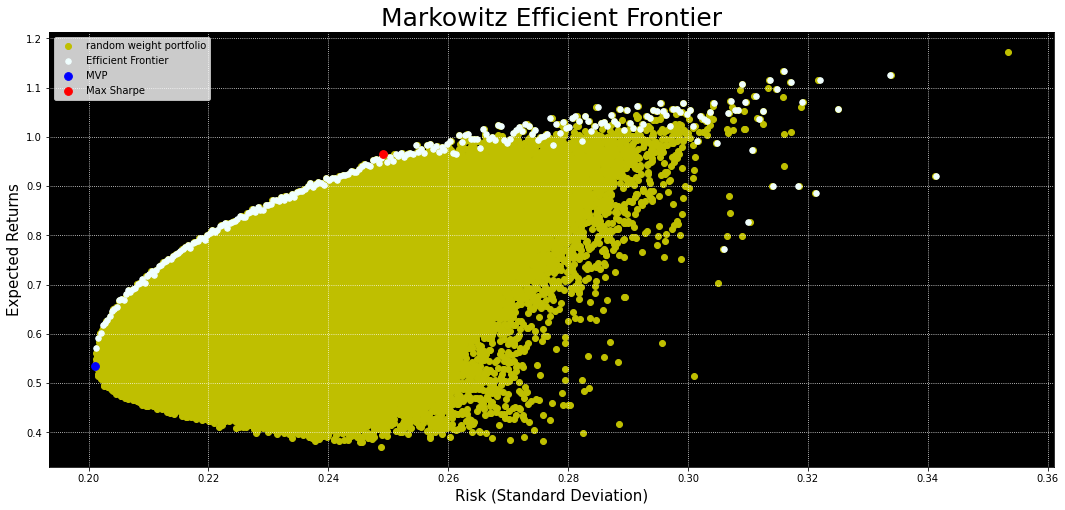

In [59]:
#PLotting
 
fig = plt.figure(figsize = (18,8))
ax = plt.subplot2grid((4,4),(0,0), rowspan =4, colspan = 4, facecolor='k') 
ax.scatter(df['Risk'],df['Returns'],color ='y', label = 'random weight portfolio')
ax.scatter(X,Y, color = 'azure', s =30, label = 'Efficient Frontier')
ax.scatter(all_data[MVP_index,1],all_data[MVP_index,0], color = 'blue', s =60, label = 'MVP')
ax.scatter(data.loc[Z]['Risk'],data.loc[Z]['Returns'], color = 'red', s =60, label = 'Max Sharpe')
#ax.scatter(tangent_line_x,tangent_line_y,s=15)
ax.grid(True, color = 'w', linestyle = ':')
plt.xlabel('Risk (Standard Deviation)',fontsize =15) 
plt.ylabel('Expected Returns',fontsize =15) 
plt.legend()
plt.title('Markowitz Efficient Frontier',fontsize =25)

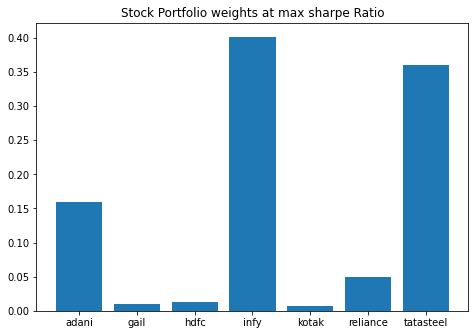

In [60]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tickers,stock_weights[Z])
plt.title("Stock Portfolio weights at max sharpe Ratio")
plt.show()

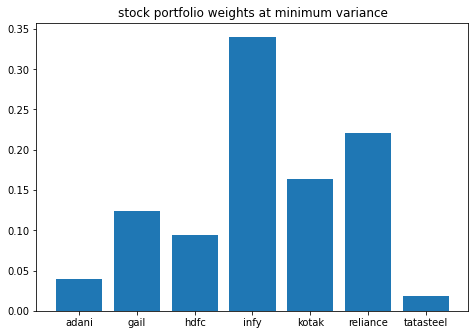

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tickers,all_data[MVP_index,2:])
plt.title("stock portfolio weights at minimum variance")
plt.show()

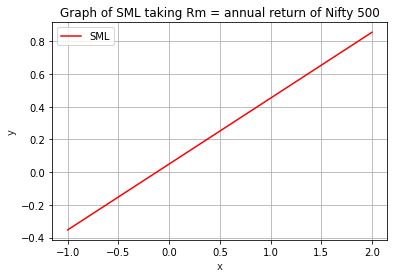

In [64]:
x = np.linspace(-1,2,100)
y = (annual_return2[7]-0.05)*x+0.05
plt.plot(x, y, '-r', label='SML')
plt.title('Graph of SML taking Rm = annual return of Nifty 500')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [67]:
print(annual_return2[7]-0.05)

0.4027781222266765


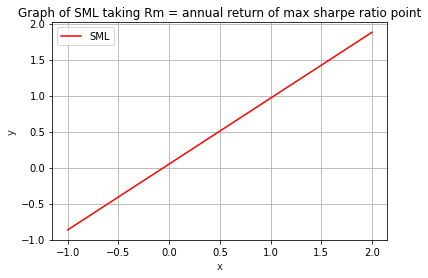

In [65]:
x = np.linspace(-1,2,100)
y = (data.loc[Z]['Returns']-0.05)*x+0.05
plt.plot(x, y, '-r', label='SML')
plt.title('Graph of SML taking Rm = annual return of max sharpe ratio point')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [66]:
print(data.loc[Z]['Returns']-0.05)

0.9148977255108385
